# EXERCISE 4

## SUPPORT VECTOR MACHINE (SVM)

## Business Problem Description

<p> Breast cancer is a disease in which breast cells grow out of control. There are different types of breast cancer. The type of breast cancer depends on which breast cells become cancerous. Breast cancer is the second most common cancer among women in the United States. Black women die from this disease at a higher rate than white women. The following algorithm will help us to determine based on 569 cancer biopsies whether the diagnosis is marked as "malignant" or "benign" by taking into account several attributes. </p>

In [1]:
# Importing all the necessary libraries/modules

import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Importing the dataset containing the information
cancer_biopsies = pd.read_csv("dataset.csv")

## Exploratory Data Analysis

In [3]:
# Displaying the information contained in the dataset

cancer_biopsies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [4]:
# Looking at the data

cancer_biopsies

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [5]:
# Diagnosis column examination

cancer_biopsies['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
# Checking if there are no missing values

cancer_biopsies.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

So far, we can observe the dataset, its data types and we could confirm there are no missing values. Notice that it contains 32 features. One of this features describes the diagnosis, which is our target value. The rest of them are numerical values indicating different attributes of the conducted biopsies but notice that they are grouped by "worst", "se" (standard error) and "mean". For this exercise, we will reduce the dimensionality of the features so we can have an easy handling of the data. Also, we will drop the "id" column.

## Feature Engineering and Statistical Analysis

In [7]:
# Generating a statistical report for the data

cancer_biopsies_report = sv.analyze(cancer_biopsies)
cancer_biopsies_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
# Dropping id column as it is not needed

cancer_biopsies = cancer_biopsies.drop('id', axis = 1)
cancer_biopsies

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [9]:
# Converting the columns to numpy arrays

x_cancer_biopsies = cancer_biopsies.drop('diagnosis', axis = 1).to_numpy()
y_cancer_biopsies = cancer_biopsies['diagnosis'].to_numpy()

# Turning off scientific notation

np.set_printoptions(suppress = True)

In [10]:
x_cancer_biopsies

array([[ 12.32   ,  12.39   ,  78.85   , ...,   0.09391,   0.2827 ,
          0.06771],
       [ 10.6    ,  18.95   ,  69.28   , ...,   0.07926,   0.294  ,
          0.07587],
       [ 11.04   ,  16.83   ,  70.92   , ...,   0.07431,   0.2998 ,
          0.07881],
       ...,
       [ 15.28   ,  22.41   ,  98.92   , ...,   0.1226 ,   0.3175 ,
          0.09772],
       [ 14.53   ,  13.98   ,  93.86   , ...,   0.1069 ,   0.2606 ,
          0.0781 ],
       [ 21.37   ,  15.1    , 141.3    , ...,   0.1966 ,   0.273  ,
          0.08666]])

In [11]:
y_cancer_biopsies

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B

In [12]:
pca = PCA(n_components = 2)
pca.fit(x_cancer_biopsies)
X_cancer = pca.transform(x_cancer_biopsies)

In [13]:
X_cancer

array([[-383.86745322,    8.91186935],
       [-550.8155364 ,  -27.39891107],
       [-497.86764525,  -28.82723528],
       ...,
       [ 107.05828016,   -0.38219657],
       [-117.87133456,   58.9600115 ],
       [ 939.39972079,  285.85296421]])

In [14]:
# Generating a new data frame from this 2D data

cancer_biopsies_info = pd.DataFrame(data = np.c_[X_cancer, y_cancer_biopsies], columns = ['Feature 1', 'Feature 2', 'Label'])

cancer_biopsies_info

,Feature 1,Feature 2,Label
0,-383.867453,8.911869,B
1,-550.815536,-27.398911,B
2,-497.867645,-28.827235,B
3,-523.163457,0.873333,B
4,-24.21458,80.777953,B
...,...,...,...
564,-227.411027,-0.502889,B
565,-622.255336,-13.532816,B
566,107.05828,-0.382197,M
567,-117.871335,58.960012,B


So far, we were able to perform some feature engineering tasks and statistical analysis of the data. Since we need to work with significant data, we reduced the original features (32 of them) to only two features that are correlated. This helps us and our model to improve in the training and prediction accuracy.

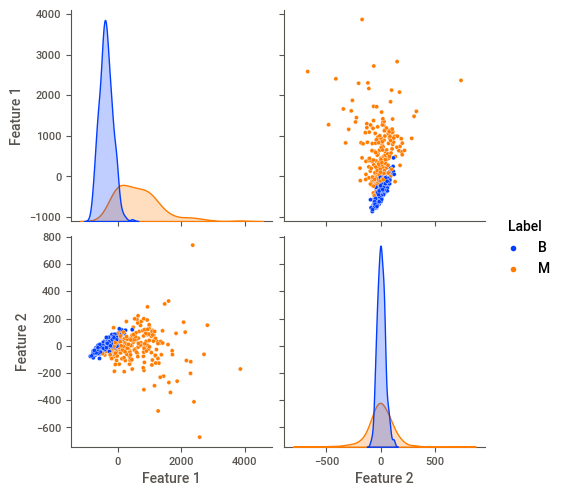

In [15]:
sns.pairplot(cancer_biopsies_info, hue = 'Label', palette = 'bright')

In [16]:
# Converting categorical values from diagnosis columns into numerical values

cancer_biopsies_info = cancer_biopsies_info.replace('B', 0)
cancer_biopsies_info = cancer_biopsies_info.replace('M', 1)

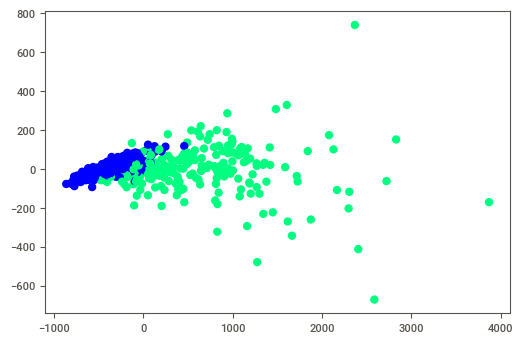

In [17]:
y = cancer_biopsies_info['Label']
X = cancer_biopsies_info.iloc[:, 0:2]
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y, s = 25, cmap = 'winter')

In [18]:
# Transforming labels into {-1, 1}

y = (2 * LabelEncoder().fit_transform(y)) - 1 # Labels : -1 and +1
y

array([-1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
        1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,
       -1,  1, -1, -1, -1

## Training and Testing

<p> The following code will help us to split our data into training, validation and testing sets. </p>

In [19]:
# Splitting data 60% training - 20% validation - 20% testing

(X_train, X_valid, y_train, y_valid) = train_test_split(X, y, test_size = 0.4, random_state = 0)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_valid, y_valid, test_size = 0.5, random_state = 0)

In [20]:
svm_kernel_linear = SVC(kernel = 'linear')
svm_kernel_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
svm_kernel_linear.support_vectors_

array([[ -46.99959732,   63.13510947],
       [ 247.07096244,  114.29591563],
       [ -37.62907412,   35.23655914],
       [ -96.55625225,  -62.35469643],
       [ -59.15737337,   38.71074425],
       [-146.89051433,   20.388089  ],
       [-192.43066999,   -5.30836619],
       [ 457.3394062 ,  117.6746039 ],
       [ -63.49267252,   -4.07985883],
       [ -39.66207192,   39.81482204],
       [-164.87330188,    2.68254509],
       [-191.6210454 ,   12.25917767],
       [ -29.53065115,   29.22975275],
       [ -12.78138356,   -7.5951997 ],
       [-183.9281351 ,  -19.40288898],
       [ -66.79162715,   37.83677258],
       [  91.16660918,   69.69070588],
       [-260.05262511,  -31.3150416 ],
       [-263.62343577,  -42.76855265],
       [-134.10339183,  -12.27880202],
       [ -41.02131852,   30.10846555],
       [ -61.94248441,   46.67275028],
       [-308.52588757,  -40.27791179],
       [  80.26989192,   33.45177335],
       [-116.0862348 ,   33.93519067],
       [ 204.75700585,   

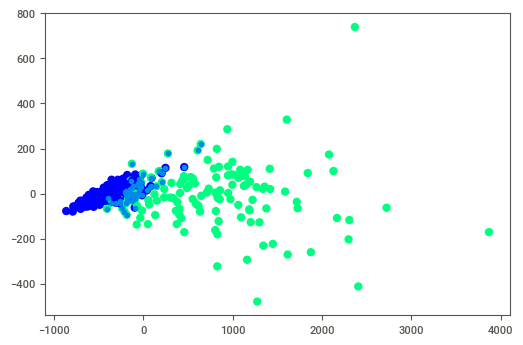

In [22]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = y_train, s = 25, cmap = 'winter')
plt.scatter(svm_kernel_linear.support_vectors_[:,0], svm_kernel_linear.support_vectors_[:,1])

C:\Miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


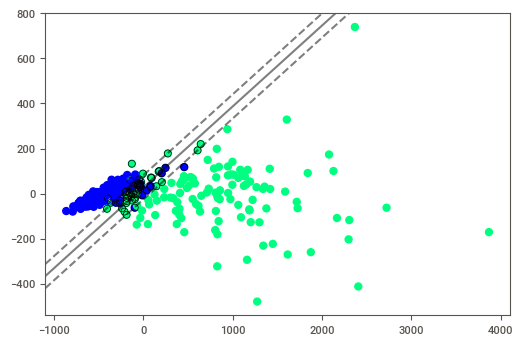

In [23]:
ax = plt.gca()

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = y_train, s = 25, cmap = 'winter')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_kernel_linear.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5,
           linestyles = ['--', '-', '--'])

ax.scatter(svm_kernel_linear.support_vectors_[:, 0], svm_kernel_linear.support_vectors_[:, 1], s = 25,
           linewidth = 0.5, facecolors = 'none', edgecolors = 'k')

plt.show()

## Cross Validation

<p> With the following code we will explore two more categories of kernel for SVM. The goal of this cross validation is to compare the behavior and accuracy of each kernel. </p>

In [24]:
svm_kernel_poly = SVC(kernel = 'poly', degree = 2)
svm_kernel_poly.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [25]:
svm_kernel_poly.support_vectors_

array([[-662.8705125 ,  -38.72301746],
       [-635.06404245,  -48.234603  ],
       [-462.96033397,  -10.9322037 ],
       [-436.33800917,  -23.00791054],
       [-470.29605856,    6.16013205],
       [-411.61468871,  -24.70255182],
       [-497.86151313,  -32.00779746],
       [-524.76915875,  -43.28719878],
       [-636.04625586,  -17.04360021],
       [-484.48154138,    0.41955708],
       [-610.88509768,   -5.74524668],
       [-453.46583669,    9.49686433],
       [-379.3529255 ,   26.28631291],
       [-544.41315564,  -46.54315518],
       [-497.86764525,  -28.82723528],
       [-732.35055847,  -53.75486907],
       [-430.03407981,   -5.31968509],
       [-628.76929579,  -41.65559212],
       [-493.64793258,    3.93097062],
       [-442.12124953,  -16.25739917],
       [-447.99886821,    4.47918121],
       [-701.73134865,  -67.73170088],
       [-745.60080797,  -56.16454295],
       [-646.3088545 ,  -58.21306207],
       [-670.67702698,  -43.20695936],
       [-401.127519  ,   

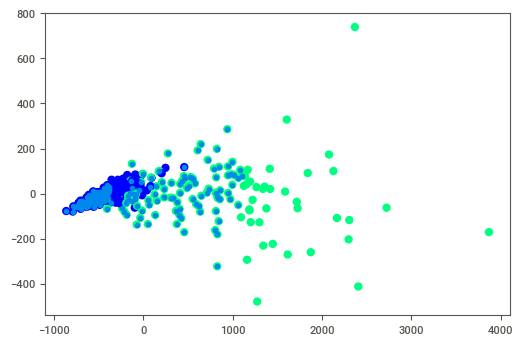

In [26]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = y_train, s = 25, cmap = 'winter')
plt.scatter(svm_kernel_poly.support_vectors_[:,0], svm_kernel_poly.support_vectors_[:,1])

C:\Miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


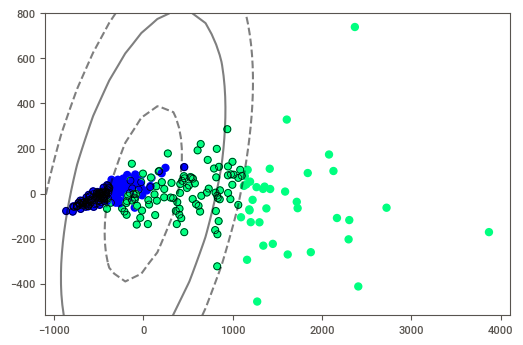

In [27]:
ax = plt.gca()

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = y_train, s = 25, cmap = 'winter')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_kernel_poly.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5,
           linestyles = ['--', '-', '--'])

ax.scatter(svm_kernel_poly.support_vectors_[:, 0], svm_kernel_poly.support_vectors_[:, 1], s = 25,
           linewidth = 0.5, facecolors = 'none', edgecolors = 'k')

plt.show()

In [28]:
svm_kernel_rbf = SVC(kernel = 'rbf')
svm_kernel_rbf.fit(X_train, y_train)

SVC()

In [29]:
svm_kernel_rbf.support_vectors_

array([[ -46.99959732,   63.13510947],
       [ 247.07096244,  114.29591563],
       [ -24.21458045,   80.77795296],
       [ -37.62907412,   35.23655914],
       [-167.74712776,   23.65573256],
       [ -96.55625225,  -62.35469643],
       [ -59.15737337,   38.71074425],
       [-146.89051433,   20.388089  ],
       [-192.43066999,   -5.30836619],
       [-168.3438669 ,   36.4380669 ],
       [ 457.3394062 ,  117.6746039 ],
       [ -63.49267252,   -4.07985883],
       [ -39.66207192,   39.81482204],
       [-164.87330188,    2.68254509],
       [-863.14230778,  -77.39952057],
       [-191.6210454 ,   12.25917767],
       [ -29.53065115,   29.22975275],
       [ -12.78138356,   -7.5951997 ],
       [ -90.54705821,   84.70293714],
       [-105.46867535,   46.56100983],
       [-183.9281351 ,  -19.40288898],
       [ -66.79162715,   37.83677258],
       [  91.16660918,   69.69070588],
       [-132.65799495,   35.09663399],
       [-260.05262511,  -31.3150416 ],
       [ -58.89248165,   

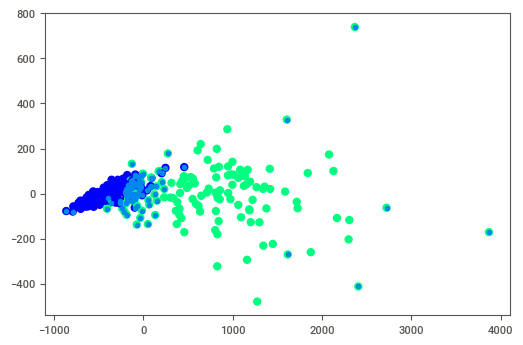

In [30]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = y_train, s = 25, cmap = 'winter')
plt.scatter(svm_kernel_rbf.support_vectors_[:,0], svm_kernel_rbf.support_vectors_[:,1])

C:\Miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


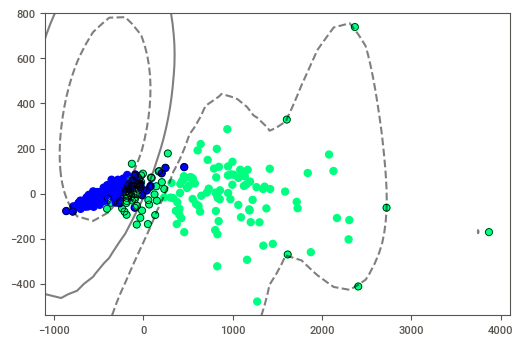

In [31]:
ax = plt.gca()

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c = y_train, s = 25, cmap = 'winter')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_kernel_rbf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], alpha = 0.5,
           linestyles = ['--', '-', '--'])

ax.scatter(svm_kernel_rbf.support_vectors_[:, 0], svm_kernel_rbf.support_vectors_[:, 1], s = 25,
           linewidth = 0.5, facecolors = 'none', edgecolors = 'k')

plt.show()

## Accuracy and Model Selection

In [32]:
acc_model_1_train = svm_kernel_linear.predict(X_train)
acc_model_1_validation = svm_kernel_linear.predict(X_validation)

acc_model_2_train = svm_kernel_poly.predict(X_train)
acc_model_2_validation = svm_kernel_poly.predict(X_validation)

acc_model_3_train = svm_kernel_rbf.predict(X_train)
acc_model_3_validation = svm_kernel_rbf.predict(X_validation)

In [33]:
print('SVM Model - Linear Kernel accuracy score rate: {} - {}'.format((accuracy_score(acc_model_1_train, y_train)), (accuracy_score(acc_model_1_validation, y_validation))))

SVM Model - Linear Kernel accuracy score rate: 0.9266862170087976 - 0.9736842105263158


In [34]:
print('SVM Model - polynomial Kernel accuracy score rate: {} - {}'.format((accuracy_score(acc_model_2_train, y_train)), (accuracy_score(acc_model_2_validation, y_validation))))

SVM Model - polynomial Kernel accuracy score rate: 0.7741935483870968 - 0.7631578947368421


In [35]:
print('SVM Model - RBF Kernel accuracy score rate: {} - {}'.format((accuracy_score(acc_model_3_train, y_train)), (accuracy_score(acc_model_3_validation, y_validation))))

SVM Model - RBF Kernel accuracy score rate: 0.9149560117302052 - 0.9298245614035088


In [36]:
svm_linear_test = svm_kernel_linear.predict(X_test)
svm_poly_test = svm_kernel_poly.predict(X_test)
svm_rbf_test = svm_kernel_rbf.predict(X_test)

print('SVM Model - Linear Kernel accuracy score: {}'.format((accuracy_score(svm_linear_test, y_test))))
print('SVM Model - Polynomial Kernel accuracy score: {}'.format((accuracy_score(svm_poly_test, y_test))))
print('SVM Model - RBF Kernel accuracy score: {}'.format((accuracy_score(svm_rbf_test, y_test))))

SVM Model - Linear Kernel accuracy score: 0.8947368421052632
SVM Model - Polynomial Kernel accuracy score: 0.7280701754385965
SVM Model - RBF Kernel accuracy score: 0.9210526315789473


## Conclusion

<p> After performing the evaluation for both training and validation sets with the SVM model under different kernels, we could observe that the score rate for a linear Kernel appeared to be the best choice for selection. However, when evaluating the models with test sets under SVM model, we can observe the RBF Kernel keeps the performance between its training and validation accuracy score rate. On the contrary, the Linear Kernel SVM model, outputs a lower rate than expected. We may then select our SVM model with an RBF Kernel. </p>